# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

In [13]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import erf 

/var/folders/jp/mlmchlc52x97jhs3jkqchtzm0000gp/T/ipykernel_6398/1719574986.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_summary.head(15).values, y=profit_summary.head(15).index, palette="viridis")


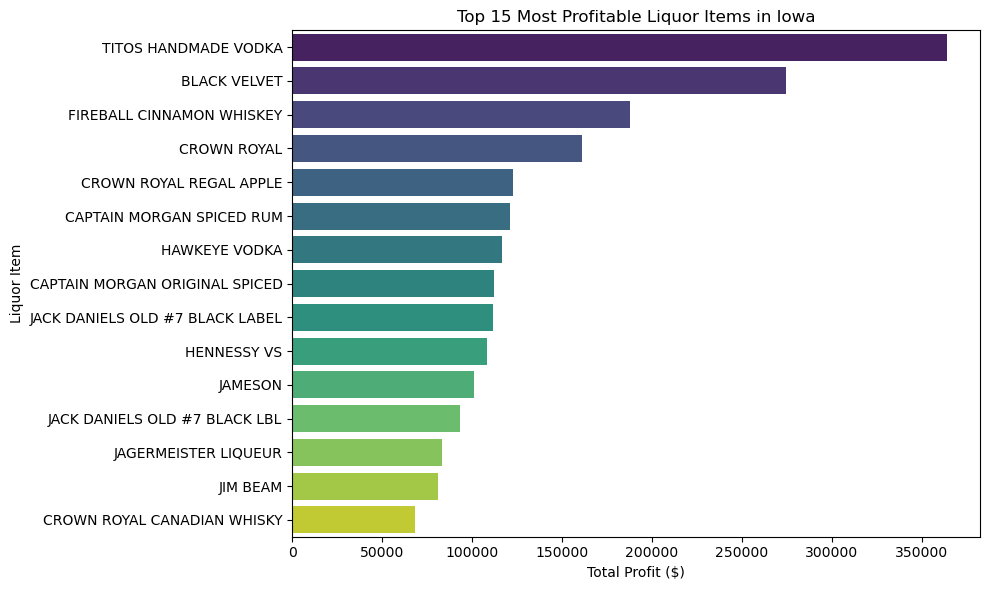

In [14]:
# load the iowa liquor sales dataset from a csv file into a pandas dataframe
iowa_data = pd.read_csv('/Users/VIDAL2/Desktop/1Masters/DS5030/assignments/assignment2ds5030/data/iowa.csv')

# display the first 5 rows of the dataset to confirm it loaded correctly
iowa_data.head()

# calculate profit per bottle by subtracting the state's cost from the retail price
iowa_data["profit_per_bottle"] = iowa_data["State Bottle Retail"] - iowa_data["State Bottle Cost"]

# calculate total profit for each transaction by multiplying profit per bottle by the number of bottles sold
iowa_data["total_profit"] = iowa_data["profit_per_bottle"] * iowa_data["Bottles Sold"]

# group the data by item description, sum the total profits, and sort from highest to lowest
profit_summary = iowa_data.groupby("Item Description")["total_profit"].sum().sort_values(ascending=False)

# display the top 15 most profitable liquor items
profit_summary.head(30)

# plot the top 15 most profitable liquor items using a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=profit_summary.head(15).values, y=profit_summary.head(15).index, palette="viridis")
plt.title("Top 15 Most Profitable Liquor Items in Iowa")
plt.xlabel("Total Profit ($)")
plt.ylabel("Liquor Item")
plt.tight_layout()
plt.show()

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(-1,1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(1,-1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [15]:
# vectors
x = np.array([1,3,5])
y = np.array([2,5])

# subtract the two vectors normally
# error: operands could not be broadcast together with shapes (3,) (2,) 
# vector_seperation = x - y

# subtract the two vectors using reshaping with correct dimensions
vector_seperation = x.reshape(-1, 1) - y.reshape(1, -1)
vector_seperation

# subtract the two vectors using reshaping with opposite dimensions
# error: operands could not be broadcast together with shapes (1,3) (1,2) 
# vector_sep = x.reshape(1, -1) - y.reshape(1, -1)
# vector_sep

# subtract the two vectors using for loops
vector_loop_value = np.zeros((len(x), len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        vector_loop_value[i, j] = x[i] - y[j]
vector_loop_value

# subtract the two vectors using numpy broadcasting
vector_brodcast_value = x[:, np.newaxis] - y[np.newaxis, :]
vector_brodcast_value

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ is false and 1 if $x \le z$ is true.

- For $y = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition that
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

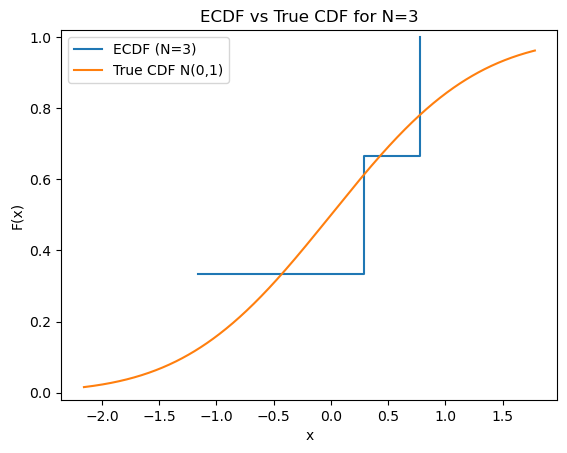

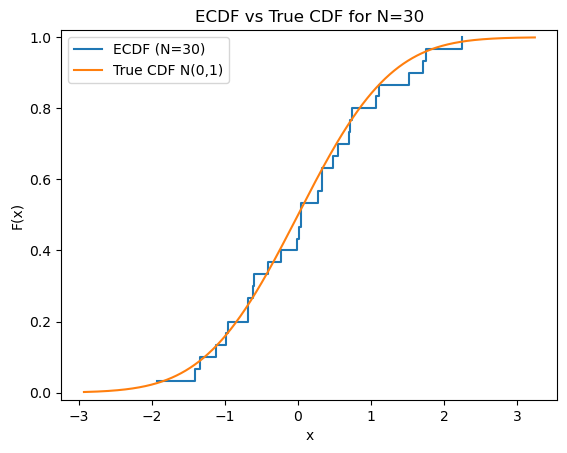

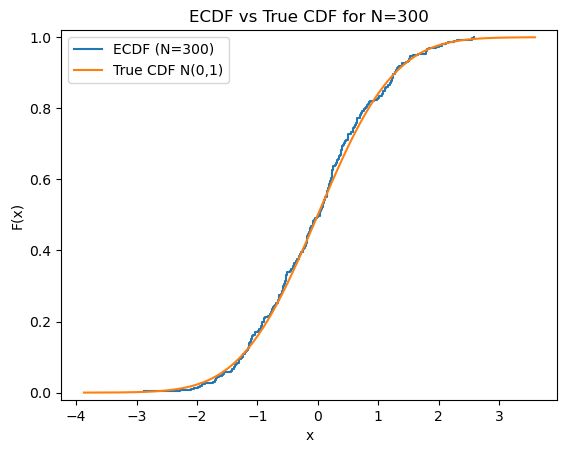

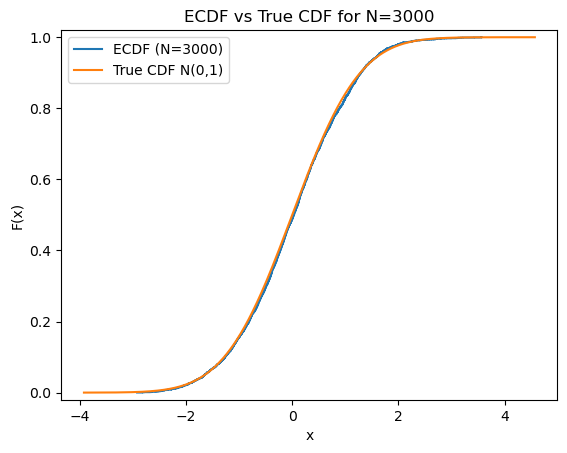

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math

def ecdf(sample: np.ndarray):
    x = np.sort(sample)
    n = x.size
    y = np.arange(1, n + 1) / n
    return x, y

def normal_cdf(x):
    # works for scalar or array
    return 0.5 * (1 + np.array([math.erf(val / np.sqrt(2)) for val in np.atleast_1d(x)]))

rng = np.random.default_rng(100)

for N in (3, 30, 300, 3000):
    X = rng.normal(0, 1, N)
    x_ecdf, y_ecdf = ecdf(X)

    plt.figure()
    plt.step(x_ecdf, y_ecdf, where="post", label=f"ECDF (N={N})")

    grid = np.linspace(x_ecdf.min() - 1, x_ecdf.max() + 1, 800)
    plt.plot(grid, normal_cdf(grid), label="True CDF N(0,1)")

    plt.title(f"ECDF vs True CDF for N={N}")
    plt.xlabel("x")
    plt.ylabel("F(x)")
    plt.ylim(-0.02, 1.02)
    plt.legend()
    plt.show()


4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

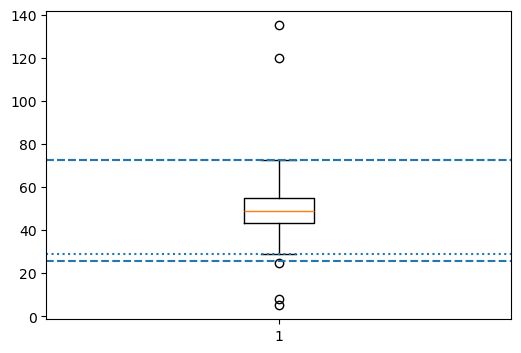

Detected outliers: 5 | Inliers: 199
First few outlier values: [24.83240289179487, 5.0, 8.0, 120.0, 135.0]


In [21]:
# Implement quantile, IQR/whiskers, five-number summary, and outlier detection
# Then apply to an example numeric variable and compare with pandas .describe

from typing import Iterable, Tuple, Dict
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def clean_numeric(x: Iterable[float]) -> np.ndarray:
    """Return 1D numpy array of finite numbers (drop NaN/inf), raise if empty after cleaning."""
    arr = np.asarray(list(x), dtype=float).ravel()
    arr = arr[np.isfinite(arr)]
    if arr.size == 0:
        raise ValueError("No finite numeric values found.")
    return arr

def quantile(values: Iterable[float], q: float) -> float:
    """
    Compute the q-quantile (0<=q<=1) without using numpy's quantile.
    Uses 'linear' interpolation between closest ranks (same as NumPy's default 'linear').
    """
    if not (0 <= q <= 1):
        raise ValueError("q must be in [0,1].")
    x = np.sort(clean_numeric(values))
    n = x.size
    # Position in 0..n-1
    pos = q * (n - 1)
    lo = int(math.floor(pos))
    hi = int(math.ceil(pos))
    if lo == hi:
        return float(x[lo])
    # Linear interpolation
    frac = pos - lo
    return float((1 - frac) * x[lo] + frac * x[hi])

def iqr_and_whiskers(values: Iterable[float]) -> Dict[str, float]:
    """
    Return Q1, Q3, IQR, Tukey fences (fence_lo, fence_hi) and data-aware whiskers
    (whisker_lo, whisker_hi) which are the min/max data points within the fences.
    """
    x = np.sort(clean_numeric(values))
    q1 = quantile(x, 0.25)
    q3 = quantile(x, 0.75)
    iqr = q3 - q1
    fence_lo = q1 - 1.5 * iqr
    fence_hi = q3 + 1.5 * iqr
    # Data-aware whiskers: closest inlier values
    whisker_lo = float(x[x >= fence_lo].min())
    whisker_hi = float(x[x <= fence_hi].max())
    return {
        "q1": float(q1),
        "q3": float(q3),
        "iqr": float(iqr),
        "fence_lo": float(fence_lo),
        "fence_hi": float(fence_hi),
        "whisker_lo": float(whisker_lo),
        "whisker_hi": float(whisker_hi),
    }

def five_number_summary(values: Iterable[float]) -> Dict[str, float]:
    """Return min, q1, median, q3, max along with data-aware whiskers for boxplot."""
    x = clean_numeric(values)
    stats = iqr_and_whiskers(x)
    summary = {
        "min": float(np.min(x)),
        "q1": stats["q1"],
        "median": quantile(x, 0.5),
        "q3": stats["q3"],
        "max": float(np.max(x)),
        "whisker_lo": stats["whisker_lo"],
        "whisker_hi": stats["whisker_hi"],
    }
    return summary

def is_outlier(values: Iterable[float]) -> np.ndarray:
    """Return boolean mask where True indicates an outlier outside Tukey fences."""
    x = np.asarray(clean_numeric(values))
    stats = iqr_and_whiskers(x)
    return (x < stats["fence_lo"]) | (x > stats["fence_hi"])

# --- Apply to an example dataset column ---
# We'll synthesize a numeric variable resembling real data with a couple of outliers.
rng = np.random.default_rng(7)
normal_part = rng.normal(loc=50, scale=10, size=200)
outliers = np.array([5, 8, 120, 135])  # a few extreme points
data = np.concatenate([normal_part, outliers])

df = pd.DataFrame({"value": data})

# Compute stats with our functions
q_requested = [0.1, 0.25, 0.5, 0.75, 0.9]
quantiles = {f"q={q}": quantile(df["value"], q) for q in q_requested}
iqr_stats = iqr_and_whiskers(df["value"])
summary = five_number_summary(df["value"])
outlier_mask = is_outlier(df["value"])

# Prepare a comparison table with pandas .describe()
describe = df["value"].describe(percentiles=[0.25, 0.5, 0.75]).to_frame(name="pandas_describe")

# Collect custom results into a DataFrame for side-by-side view
custom_summary_df = pd.DataFrame({
    "stat": ["min", "q1", "median", "q3", "max", "iqr", "fence_lo", "fence_hi", "whisker_lo", "whisker_hi"],
    "value": [
        summary["min"], summary["q1"], summary["median"], summary["q3"], summary["max"],
        iqr_stats["iqr"], iqr_stats["fence_lo"], iqr_stats["fence_hi"], iqr_stats["whisker_lo"], iqr_stats["whisker_hi"]
    ]
})

quantile_table = pd.DataFrame.from_dict(quantiles, orient="index", columns=["custom_quantile"])

# --- Plot a simple matplotlib boxplot using our whiskers for visual inspection ---
fig, ax = plt.subplots(figsize=(6, 4))
# Matplotlib's boxplot will compute its own stats by default; to reflect ours we could use 'manage_ticks' only.
# For a straightforward visual, we show the raw boxplot and overlay our fences/whiskers.
bp = ax.boxplot(df["value"].values, vert=True, showfliers=True)
ax.axhline(iqr_stats["fence_lo"], linestyle="--")
ax.axhline(iqr_stats["fence_hi"], linestyle="--")
ax.axhline(iqr_stats["whisker_lo"], linestyle=":")
ax.axhline(iqr_stats["whisker_hi"], linestyle=":")
plt.show()

# Show how many outliers we detected
outlier_count = int(outlier_mask.sum())
inlier_count = int((~outlier_mask).sum())

print(f"Detected outliers: {outlier_count} | Inliers: {inlier_count}")
print("First few outlier values:", df['value'][outlier_mask].head().to_list())


5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?